<font color='red'><b> TF-IDFW2V</b></font>

<b>Tfidf w2v (w1,w2..) = (tfidf(w1) * w2v(w1) + tfidf(w2) * w2v(w2) + …)  /    (tfidf(w1) + tfidf(w2) + …)</b>

In [45]:
#loading glove vectors.
import pickle
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [46]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/lazyhacker/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [47]:
#Imporing nltk sentiment analyzer.
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')


neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

In [48]:
#loading data.
import pandas
data = pandas.read_csv('preprocessed_data.csv')

In [49]:
#sample data.
print(data.head())

  school_state teacher_prefix project_grade_category  \
0           ca            mrs          grades_prek_2   
1           ut             ms             grades_3_5   
2           ca            mrs          grades_prek_2   
3           ga            mrs          grades_prek_2   
4           wa            mrs             grades_3_5   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            53                    1   
1                                             4                    1   
2                                            10                    1   
3                                             2                    1   
4                                             2                    1   

    clean_categories                 clean_subcategories  \
0       math_science  appliedsciences health_lifescience   
1       specialneeds                        specialneeds   
2  literacy_language                            li

In [60]:
#assigning train and test data.
y=data["project_is_approved"].values
x=data.drop(["project_is_approved"],axis=1) 

In [93]:
#splitting data into train and test.
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, stratify=y)

In [103]:
#shape of train and test.
print("SHAPES OF ")
print("---------")
print("X_TRAIN    Y_TRAIN ")
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

SHAPES OF 
---------
X_TRAIN    Y_TRAIN 
(87398, 8) (87398,)
(21850, 8) (21850,)


In [115]:
#vectorizing data.
from sklearn.feature_extraction.text import CountVectorizer


print("FEATURE NAME:                       SHAPE AFTER TRANSFORMATION")
print("--------------------------------------------------------------")
print("                                              X         Y")
school_state_vectorizer = CountVectorizer(binary=True)
school_state_vectorizer.fit(x_train['school_state'].values)
x_train_school_state_ohe = school_state_vectorizer.transform(x_train['school_state'].values)
x_test_school_state_ohe = school_state_vectorizer.transform(x_test['school_state'].values)
print("school_state               train :      ",x_train_school_state_ohe.shape,y_train.shape)
print("                           test  :      ",x_test_school_state_ohe.shape,y_test.shape)


teacher_prefix_vectorizer = CountVectorizer(binary=True)
teacher_prefix_vectorizer.fit(x_train['teacher_prefix'].values)
x_train_teacher_prefix_ohe = teacher_prefix_vectorizer.transform(x_train['teacher_prefix'].values)
x_test_teacher_prefix_ohe = teacher_prefix_vectorizer.transform(x_test['teacher_prefix'].values)
print("teacher_prefix             train :      ",x_train_teacher_prefix_ohe.shape,y_train.shape)
print("                           test  :      ",x_test_teacher_prefix_ohe.shape,y_test.shape)

project_grade_category_vectorizer = CountVectorizer(binary=True)
project_grade_category_vectorizer.fit(x_train['project_grade_category'].values)
x_train_project_grade_category_ohe = project_grade_category_vectorizer.transform(x_train['project_grade_category'].values)
x_test_project_grade_category_ohe = project_grade_category_vectorizer.transform(x_test['project_grade_category'].values)
print("project_grade_category     train :      ",x_train_project_grade_category_ohe.shape,y_train.shape)
print("                           test  :      ",x_test_project_grade_category_ohe.shape,y_test.shape) 

clean_categories_vectorizer = CountVectorizer(binary=True)
clean_categories_vectorizer.fit(x_train['clean_categories'].values)
x_train_clean_categories_vectorizer_ohe = clean_categories_vectorizer.transform(x_train['clean_categories'].values)
x_test_clean_categories_vectorizer_ohe = clean_categories_vectorizer.transform(x_test['clean_categories'].values)
print("clean_categories           train :      ",x_train_clean_categories_vectorizer_ohe.shape,y_train.shape)
print("                           test  :      ",x_test_clean_categories_vectorizer_ohe.shape,y_test.shape)

clean_subcategories_vectorizer = CountVectorizer(binary=True)
clean_subcategories_vectorizer.fit(x_train['clean_subcategories'].values)
x_train_clean_subcategories_vectorizer_ohe = clean_subcategories_vectorizer.transform(x_train['clean_subcategories'].values)
x_test_clean_subcategories_vectorizer_ohe = clean_subcategories_vectorizer.transform(x_test['clean_subcategories'].values)
print("clean_subcategories        train :      ",x_train_clean_subcategories_vectorizer_ohe.shape,y_train.shape)
print("                           test  :      ",x_test_clean_subcategories_vectorizer_ohe.shape,y_test.shape)

FEATURE NAME:                       SHAPE AFTER TRANSFORMATION
--------------------------------------------------------------
                                              X         Y
school_state               train :       (87398, 51) (87398,)
                           test  :       (21850, 51) (21850,)
teacher_prefix             train :       (87398, 5) (87398,)
                           test  :       (21850, 5) (21850,)
project_grade_category     train :       (87398, 4) (87398,)
                           test  :       (21850, 4) (21850,)
clean_categories           train :       (87398, 9) (87398,)
                           test  :       (21850, 9) (21850,)
clean_subcategories        train :       (87398, 30) (87398,)
                           test  :       (21850, 30) (21850,)


In [118]:
from sklearn.feature_extraction.text import TfidfVectorizer
essay_tfidf_vectorizer = TfidfVectorizer()
essay_tfidf_vectorizer.fit(x_train['essay'].values)
x_train_essay_tfidf = essay_tfidf_vectorizer.transform(x_train['essay'].values)
x_test_essay_tfidf = essay_tfidf_vectorizer.transform(x_test['essay'].values)


print("FEATURE NAME:                       SHAPE AFTER TRANSFORMATION-TFIDF")
print("--------------------------------------------------------------")
print("essay                            train  ",x_train_essay_tfidf.shape,y_train.shape)
print("                                 test   ",x_test_essay_tfidf.shape,y_test.shape)

FEATURE NAME:                       SHAPE AFTER TRANSFORMATION-TFIDF
--------------------------------------------------------------
essay                            train   (87398, 51618) (87398,)
                                 test    (21850, 51618) (21850,)


In [119]:
print(x_train.head())

      school_state teacher_prefix project_grade_category  \
1758            nj             ms             grades_3_5   
34447           mo             ms          grades_prek_2   
87384           ga            mrs          grades_prek_2   
41029           fl            mrs             grades_3_5   
72073           nc             ms             grades_3_5   

       teacher_number_of_previously_posted_projects   clean_categories  \
1758                                              1       math_science   
34447                                            46  literacy_language   
87384                                           112  literacy_language   
41029                                             4       math_science   
72073                                            11       math_science   

               clean_subcategories  \
1758                   mathematics   
34447           literature_writing   
87384                     literacy   
41029  appliedsciences mathematics   
7207

In [125]:
#normalizing numerical values
from sklearn.preprocessing import Normalizer

normalizer1=Normalizer()
normalizer1.fit(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
x_train_teacher_number_of_previously_posted_projects=normalizer1.transform(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
x_test_teacher_number_of_previously_posted_projects=normalizer1.transform(x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))


normalizer2=Normalizer()
normalizer2.fit(x_train['price'].values.reshape(-1,1))
x_train_price=normalizer1.transform(x_train['price'].values.reshape(-1,1))
x_test_price=normalizer1.transform(x_test['price'].values.reshape(-1,1))



print("FEATURE NAME:                                    SHAPE AFTER TRANSFORMATION-TFIDF")
print("--------------------------------------------------------------")
print("teacher_number_of_previously_posted_projects      train  ",x_train_essay_tfidf.shape,y_train.shape)
print("                                                  test   ",x_test_essay_tfidf.shape,y_test.shape)

print("price                                             train  ",x_train_essay_tfidf.shape,y_train.shape)
print("                                                  test   ",x_test_essay_tfidf.shape,y_test.shape)

FEATURE NAME:                                    SHAPE AFTER TRANSFORMATION-TFIDF
--------------------------------------------------------------
teacher_number_of_previously_posted_projects      train   (87398, 51618) (87398,)
                                                  test    (21850, 51618) (21850,)
price                                             train   (87398, 51618) (87398,)
                                                  test    (21850, 51618) (21850,)


In [133]:
#intializing tfidfvectorizer and vectorizing the data.
tfidf_model = TfidfVectorizer()
tfidf_model.fit(x_train['essay'].values)
x_train_essay_tfidf=tfidf_model.transform(x_train['essay'].values)
x_test_essay_tfidf=tfidf_model.transform(x_test['essay'].values)
print("FEATURE NAME:                       SHAPE AFTER TRANSFORMATION-TFIDF_W2V")
print("--------------------------------------------------------------")
print("essay                             train ",x_train_essay_tfidf.shape,y_train.shape)
print("                                  test  ",x_test_essay_tfidf.shape,y_test.shape)

FEATURE NAME:                       SHAPE AFTER TRANSFORMATION-TFIDF_W2V
--------------------------------------------------------------
essay                             train  (87398, 51618) (87398,)
                                  test   (21850, 51618) (21850,)


In [154]:
#customized tfidf word 2 vec.
import numpy as np
def tfidf_w2v(d):
    tfidf_words = set(tfidf_model.get_feature_names())
    dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
    tfidf_words = set(tfidf_model.get_feature_names())
    from tqdm import tqdm
    tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(d.values): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)
    return tfidf_w2v_vectors
x_train_essay_tfidf_w2v=tfidf_w2v(x_train['essay'])
x_test_essay_tfidf_w2v=tfidf_w2v(x_test['essay'])

100%|██████████| 21850/21850 [00:59<00:00, 369.60it/s]


In [153]:
print("FEATURE NAME:                           SHAPE AFTER TRANSFORMATION-TFIDF_W2V")
print("---------------------------------------------------------------------------")
print("                                          X      Y")
print("essay                            train ",len(x_train_essay_tfidf_w2v),y_train.shape)
print("                                 test  ",len(x_test_essay_tfidf_w2v),y_test.shape)

FEATURE NAME:                           SHAPE AFTER TRANSFORMATION-TFIDF_W2V
---------------------------------------------------------------------------
                                          X      Y
essay                            train  87398 (87398,)
                                 test   21850 (21850,)


In [53]:
import pandas as pd
preprocessed_essay=pd.read_csv('preprocessed_data.csv')
preprocessed_essay.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


In [134]:
#https://stackoverflow.com/questions/42650881/how-to-get-the-positive-score-only
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def pscore(s):
    sid = SentimentIntensityAnalyzer()
    ss = sid.polarity_scores(s)['pos']
    return ss
x_train_p_df=x_train['essay'].apply(pscore)
x_test_p_df=x_test['essay'].apply(pscore)
print("FEATURE NAME:                       SHAPE AFTER TRANSFORMATION-sentiment_score")
print("------------------------------------------------------------------------------")
print("                                            X       Y")
print("essay                               train ",x_train_p_df.shape
print("                                    test  ",x_test_p_df.shape)

FEATURE NAME:                       SHAPE AFTER TRANSFORMATION-sentiment_score
--------------------------------------------------------------
essay                             train  (87398,)
                                  test   (21850,)


In [161]:
print(type(x_train_p_df))
normalizer3=Normalizer()
normalizer3.fit(x_train_p_df.values.reshape(-1,1))
x_train_p_df_v=normalizer3.transform(x_train_p_df.values.reshape(-1,1))
x_test_p_df_v=normalizer3.transform(x_test_p_df.values.reshape(-1,1))




<class 'pandas.core.series.Series'>


In [160]:
print(x_train_p_df[9:14])

35939    0.240
75792    0.165
81396    0.324
74915    0.440
73941    0.233
Name: essay, dtype: float64


In [164]:
#https://stackoverflow.com/questions/7922487/how-to-transform-numpy-matrix-or-array-to-scipy-sparse-matrix
from scipy.sparse import hstack

set1_train=hstack((x_train_school_state_ohe,x_train_teacher_prefix_ohe,x_train_project_grade_category_ohe,x_train_clean_categories_vectorizer_ohe,x_train_clean_subcategories_vectorizer_ohe,x_train_essay_tfidf,x_train_p_df_v)).tocsr()
set1_test=hstack((x_test_school_state_ohe,x_test_teacher_prefix_ohe,x_test_project_grade_category_ohe,x_test_clean_categories_vectorizer_ohe,x_test_clean_subcategories_vectorizer_ohe,x_test_essay_tfidf,x_test_p_df_v)).tocsr()


set2_train=hstack((x_train_school_state_ohe,x_train_teacher_prefix_ohe,x_train_project_grade_category_ohe,x_train_clean_categories_vectorizer_ohe,x_train_clean_subcategories_vectorizer_ohe,x_train_essay_tfidf_w2v,x_train_p_df_v)).tocsr()
set2_test=hstack((x_test_school_state_ohe,x_test_teacher_prefix_ohe,x_test_project_grade_category_ohe,x_test_clean_categories_vectorizer_ohe,x_test_clean_subcategories_vectorizer_ohe,x_test_essay_tfidf_w2v,x_test_p_df_v)).tocsr()

In [177]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
clf=DecisionTreeClassifier()
gv={'max_depth':[1, 5, 10, 50],'min_samples_split':[5, 10, 100, 500]}


In [178]:
clf_f1=GridSearchCV(clf,gv,scoring='roc_auc')
clf_f1.fit(set1_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 5, 10, 50],
                         'min_samples_split': [5, 10, 100, 500]},
             scoring='roc_auc')

In [ ]:
#testing decision tree on 2 sets of data.
#1.set1=data+tfidf+polarity
#2.set2=data+tfidf_w2v+polarity

In [180]:
clf_f1.cv_results_

{'mean_fit_time': array([ 2.88711166,  2.86032557,  2.84307628,  2.88736343,  7.51753855,
         7.44965897,  7.43731256,  7.37005744, 16.3540556 , 16.10131626,
        15.43371563, 14.16570835, 92.67027411, 90.20429382, 83.06793747,
        71.34499555]),
 'std_fit_time': array([0.10372847, 0.02542091, 0.05903581, 0.0634103 , 0.02838598,
        0.0436203 , 0.08713203, 0.10264029, 0.18731693, 0.21156561,
        0.1059281 , 0.14197535, 1.53111217, 1.19147303, 1.62082134,
        1.55524446]),
 'mean_score_time': array([0.04483361, 0.04248538, 0.04275475, 0.04324083, 0.04358282,
        0.04370956, 0.04418893, 0.04353228, 0.04903264, 0.0442976 ,
        0.04449434, 0.04409466, 0.05053153, 0.05002012, 0.05189853,
        0.04639301]),
 'std_score_time': array([0.0032948 , 0.00055744, 0.00057619, 0.00267005, 0.00127228,
        0.00058709, 0.0027568 , 0.00154106, 0.00479389, 0.00194395,
        0.00192179, 0.00166818, 0.0021676 , 0.00081279, 0.00233954,
        0.00125039]),
 'param_ma

In [181]:
clf_f1.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_split=500)

In [182]:
clf_f1.best_score_

0.6205411972455885

In [183]:
clf_f1.best_params_

{'max_depth': 10, 'min_samples_split': 500}

In [ ]:
best_n_estimators_value = clf_f1.best_params_['n_estimators']
best_max_depth_value = clf_f1.best_params_['max_depth']
best_score = clf_f1.best_score_

In [201]:
AUC_f1=clf_f1.cv_results_['mean_score_time']
print(AUC_f1)

[0.04483361 0.04248538 0.04275475 0.04324083 0.04358282 0.04370956
 0.04418893 0.04353228 0.04903264 0.0442976  0.04449434 0.04409466
 0.05053153 0.05002012 0.05189853 0.04639301]


In [187]:
clf1=DecisionTreeClassifier(max_depth=10,min_samples_split=500)
clf1.fit(set1_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=500)

[[0.16816159 0.83183841]
 [0.16816159 0.83183841]
 [0.25147929 0.74852071]
 ...
 [0.09908729 0.90091271]
 [0.25147929 0.74852071]
 [0.11544738 0.88455262]]
0.6289669001399092


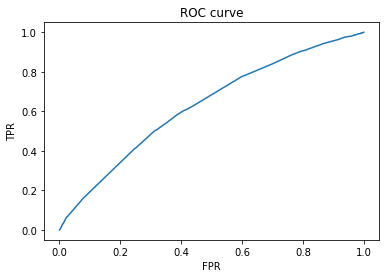

In [197]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

p1=clf1.predict_proba(set1_test)
print(p1)

print(roc_auc_score(y_test, p1[:,1]))

fpr, tpr, _ = roc_curve(y_test, p1[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [176]:
clf_f2=GridSearchCV(clf,gv,scoring='roc_auc')
clf_f2.fit(set2_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 5, 10, 50],
                         'min_samples_split': [5, 10, 100, 500]},
             scoring='roc_auc')

In [179]:
clf_f2.cv_results_

{'mean_fit_time': array([  5.37354345,   5.8121685 ,   4.68555655,   4.2460052 ,
         19.23277588,  19.24668221,  19.47361126,  18.80061831,
         57.43684535,  55.7386858 ,  46.47465916,  41.90550261,
        198.91725283, 197.56720691, 184.78205471, 117.24092302]),
 'std_fit_time': array([0.85576025, 1.59672494, 0.38189298, 0.25427638, 0.91856053,
        1.42472022, 1.10132212, 0.36200677, 8.2274153 , 4.01148265,
        1.78788906, 1.87901865, 5.94836306, 3.60002067, 5.51368907,
        4.24317874]),
 'mean_score_time': array([0.08076982, 0.0934638 , 0.09825621, 0.07755809, 0.07889867,
        0.07689538, 0.07882633, 0.07772646, 0.08655281, 0.08673086,
        0.07711043, 0.07671909, 0.07934132, 0.0781919 , 0.07761016,
        0.07760363]),
 'std_score_time': array([0.00318917, 0.03116592, 0.02396389, 0.00787152, 0.00932324,
        0.00328292, 0.00351629, 0.00272409, 0.00578884, 0.0077146 ,
        0.00322696, 0.0027663 , 0.0035502 , 0.00153686, 0.00166907,
        0.001097

In [184]:
clf_f2.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_split=500)

In [185]:
clf_f2.best_score_

0.6184762039853325

In [186]:
clf_f2.best_params_

{'max_depth': 5, 'min_samples_split': 500}